In [17]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)

In [18]:
#Explore the basic statistics of the numerical features using the describe() function.
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [23]:
# by view the statiscal for numerical features ,
# we can detect outliers in the Age, SibSp, Parch, and Fare columns

# We can use the IQR (Interquartile Range) method to detect and handle outliers in the Age column 
# We can define a function to calculate the IQR and the upper and lower bounds,
# and then use that function to identify and replace the outliers in the Age column with the median age.

def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.clip(lower_bound, upper_bound)
    return column


# We can define a function to calculate the upper bound for the SibSp and Parch columns
# based on the 99th percentage value, and then use that function to identify and 
# replace the outliers in those columns with the upper bound.

def handle_outliers_upper_bound(column):
    upper_bound = column.quantile(0.99)
    column = column.clip(upper=upper_bound)
    return column






In [24]:
# implemet the previous methods in the colums


# will implement the  IQR (Interquartile Range) method  on Age and fare colums

df['Age'] = handle_outliers_iqr(df['Age'])
df['Fare'] = handle_outliers_iqr(df['Fare'])


# will implement upper bound method in the he SibSp and Parch columns


df['SibSp'] = handle_outliers_upper_bound(df['SibSp'])
df['Parch'] = handle_outliers_upper_bound(df['Parch'])



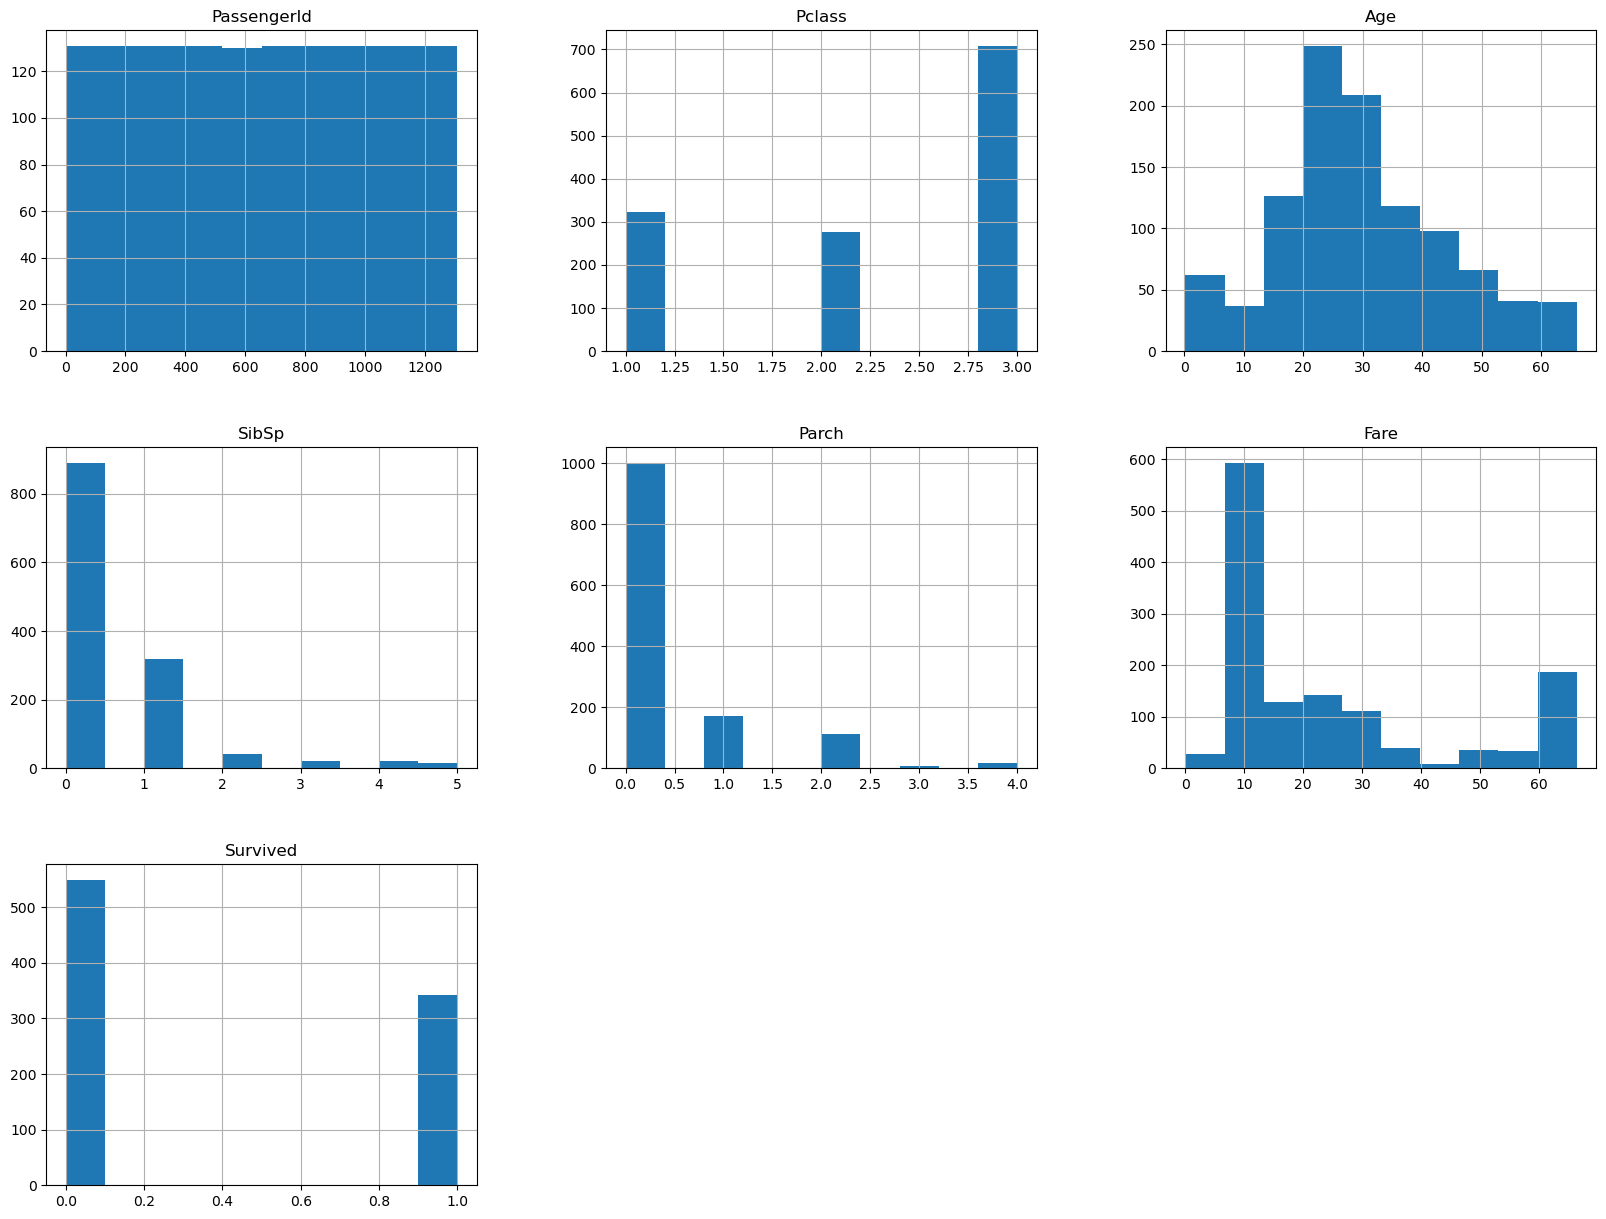

In [21]:
import matplotlib.pyplot as plt

# Visualize the distribution of numerical features
df.hist(bins=10, figsize=(20,15))
plt.show()

In [25]:
#Handle missing values by either dropping the 
# rows with missing values or filling them with appropriate values.

# Dropping the Cabin column since it has a lot of missing values
df.drop('Cabin', axis=1, inplace=True)

# Filling the missing values in the Age column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling the missing values in the Fare column with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Filling the missing values in the Embarked column with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [26]:
# Convert the Sex column to numerical values
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Convert the Embarked column to numerical values
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [27]:
#check if there is any missing values in the dataset 

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Survived       418
dtype: int64

In [12]:

# Split the concatenated DataFrame into training and test datasets
train_df = df.iloc[:len(train_df)]
test_df = df.iloc[len(train_df):].reset_index(drop=True)
